In [3]:
# check version of cv2
import cv2

cv2.__version__


'2.4.11'

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

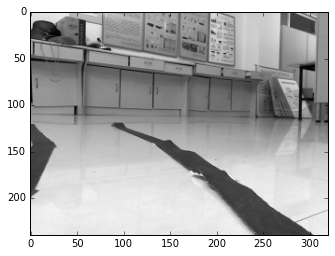

In [113]:
# load data
image = cv2.imread('training_images/frame00588.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)
plt.show()
image.shape

image = np.reshape(image, (240,320))

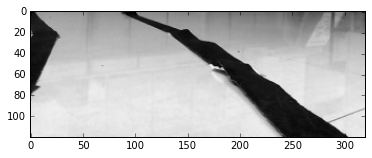

(120L, 320L)
(38400L,)
[ 134.  130.  131. ...,  191.  190.  177.]
[[ 134.  130.  131. ...,  191.  190.  177.]]


In [120]:
# image.shape

# image = cv2.imdecode(np.fromstring(image, dtype=np.uint8), 0)
# image_array = np.zeros((1, 38400))
roi = image[120:240, :]

# plt.gray()
plt.imshow(roi)
plt.show()
print roi.shape
# temp_array = roi.reshape(1, 38400).astype(np.float32)
# image_array = np.vstack((image, test_temp))

roi = np.reshape(roi, (1, 38400)).astype(np.float64)

# roi.shape

test = roi[:, :][0]

print test.shape
test.tolist
print test
test = np.reshape(test, (1, 38400)).astype(np.float64)
print test

['train_labels', 'train']
(298L, 38400L)
(298L, 4L)
(299L, 38400L)
[  81.   80.   81. ...,  154.  156.  142.]


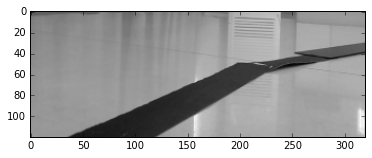

In [109]:
import cv2
import numpy as np
import glob


# load training data
image_array = np.zeros((1, 38400))
label_array = np.zeros((1, 4), 'float')
training_data = glob.glob('testing_data/test007.npz')


for single_npz in training_data:
    with np.load(single_npz) as data:
        print data.files
        test_temp = data['train']
        test_labels_temp = data['train_labels']
        print test_temp.shape
        print test_labels_temp.shape
    image_array = np.vstack((image_array, test_temp))
    label_array = np.vstack((label_array, test_labels_temp))
    print image_array.shape

    
image = image_array[18,:]
print image
image = np.reshape(image, (120, 320))

plt.imshow(image)
plt.show()


In [99]:

test = image_array[18, :]
# test_labels = label_array[18, :]
# test.reshape((1, 38400))
test = np.reshape(test,(1, 38400))
print test.shape
print test_labels.shape
print test


(1L, 38400L)
(4L,)
[[  81.   80.   81. ...,  154.  156.  142.]]


In [111]:
# create MLP
layer_sizes = np.array([38400, 32, 4], dtype=np.int32)
model = cv2.ANN_MLP()
model.create(layer_sizes)
model.load('mlp_xml/mlp_final1.xml')
# model = cv2.ml.
# generate predictions


In [121]:
ret, resp = model.predict(test)
prediction = resp.argmax(-1)

print 'Prediction:', prediction


Prediction: [3]
